# Projet ML Souleymane Mbaye

In [4]:
import sys
sys.path.append('./')
from src import Loss,Modules
import matplotlib.pyplot as plt
import pickle as pkl
%matplotlib inline  


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Test du Module Linear avec MSELoss sur la classification de chiffres de 0 à 9

In [2]:
import numpy as np
import pickle as pkl

data = pkl.load(open('data/usps.pkl', 'rb'))
X = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Y = np.array(data['Y_train'], dtype=int)
X_test = np.array(data['X_test'], dtype=float)
Y_test = np.array(data['Y_test'], dtype=int)

Y[:5],Y_test[:5]

(array([0, 9, 7, 0, 2]), array([2, 0, 0, 2, 7]))

In [3]:
model_lin_1 = Modules.Linear(256,16)

model_tanh = Modules.TanH()
# model_tanh.ajouter_precendent(model_lin_1)
# model_lin_1.ajouter_suivant(model_tanh)

model_lin_2 = Modules.Linear(16,10)
# model_lin_2.ajouter_precendent(model_tanh)
# model_tanh.ajouter_suivant(model_lin_2)

model_sig = Modules.Sigmoid()
# model_sig.ajouter_precendent(model_lin_2)
# model_lin_2.ajouter_suivant(model_sig)

model_softmax = Modules.Softmax()
# model_softmax.ajouter_precendent(model_sig)
# model_sig.ajouter_suivant(model_softmax)

loss_fn = Loss.CELoss()

reseau_seq = Modules.Sequentiel((model_lin_1,
                                 model_tanh,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))

optim = Modules.Optim(reseau_seq,loss_fn,lr=1e-3)

In [182]:
l_train_loss = Modules.SGD(reseau_seq,loss_fn,(X,Y),batch_size=5,epochs=10_000,lr=1e-3)
pred_test = Modules.prediction(X_test,reseau_seq)
pred_train = Modules.prediction(X,reseau_seq)

correct_test = (pred_test == Y_test).sum() / len(Y_test)
correct_train = (pred_train == Y).sum() / len(Y)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  97.8
# Accuracy test: 
#  93.7

Accuracy train: 
 97.8
Accuracy test: 
 93.7


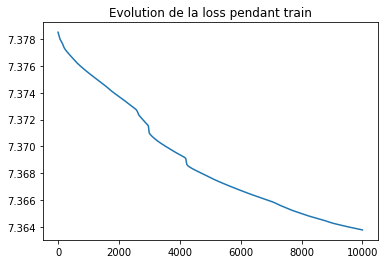

In [183]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()

## 2. Test du Module Linear avec la base MNIST

In [9]:
# Charger les données à partir du fichier
with open('data/mnist_data.pkl', 'rb') as f:
  X, y = pkl.load(f)

print(f"Shape: {X.shape}")

L = [i for i in range(len(y))]
np.random.shuffle(L)

n_80 = int(0.8 * len(y))

X_train,y_train = X[L[:n_80]],y[L[:n_80]]
X_test,y_test = X[L[n_80:]],y[L[n_80:]]

print(f"\nTaille de la base train: {len(y_train)}\nTaille de la base test: {len(y_test)}")


Shape: (70000, 784)

Taille de la base train: 56000
Taille de la base test: 14000


In [10]:
y[:5]

array([5, 0, 4, 1, 9])

In [6]:
model_lin_1 = Modules.Linear(784,200)

model_tanh = Modules.TanH()

model_lin_2 = Modules.Linear(200,10)

model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq = Modules.Sequentiel((model_lin_1,
                                 model_tanh,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))

optim = Modules.Optim(reseau_seq,loss_fn,lr=1e-3)

In [11]:
l_train_loss = Modules.SGD(reseau_seq,loss_fn,(X_train,y_train),batch_size=5,epochs=10_0,lr=1e-3)
pred_test = Modules.prediction(X_test,reseau_seq)
pred_train = Modules.prediction(X_train,reseau_seq)

correct_test = (pred_test == y_test).sum() / len(y_test)
correct_train = (pred_train == y_train).sum() / len(y_train)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  97.7
# Accuracy test: 
#  96.3

Accuracy train: 
 97.7
Accuracy test: 
 96.3


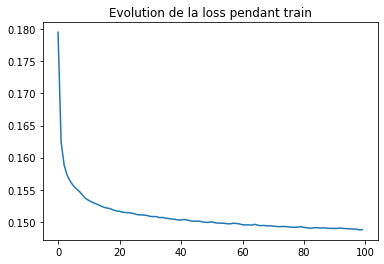

In [12]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()

## 3. Test avec la base Fashion-MNIST

In [5]:
with open('data/fashion_mnist_data.pkl', 'rb') as f:
  (X_train, y_train), (X_test, y_test) = pkl.load(f)

X_train = X_train.reshape((len(X_train),-1))
X_test = X_test.reshape((len(X_test),-1))

print(f"Taille train: {X_train.shape}\nTaille test: {X_test.shape}")

Taille train: (60000, 784)
Taille test: (10000, 784)


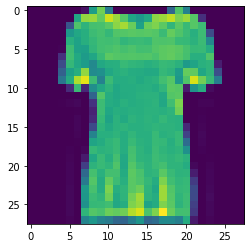

In [7]:
plt.figure()
plt.imshow(X_train[10].reshape((28,28)))

In [8]:
model_lin_1 = Modules.Linear(784,200)

model_tanh = Modules.TanH()

model_lin_2 = Modules.Linear(200,10)

model_sig = Modules.Sigmoid()

model_softmax = Modules.Softmax()

loss_fn = Loss.CELoss()

reseau_seq = Modules.Sequentiel((model_lin_1,
                                 model_tanh,
                                 model_lin_2,
                                 model_sig,
                                 model_softmax))

optim = Modules.Optim(reseau_seq,loss_fn,lr=1e-3)

In [12]:
l_train_loss = Modules.SGD(reseau_seq,loss_fn,(X_train,y_train),batch_size=5,epochs=10_0,lr=1e-3)
pred_test = Modules.prediction(X_test,reseau_seq)
pred_train = Modules.prediction(X_train,reseau_seq)

correct_test = (pred_test == y_test).sum() / len(y_test)
correct_train = (pred_train == y_train).sum() / len(y_train)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  81.2
# Accuracy test: 
#  79.8

Accuracy train: 
 81.2
Accuracy test: 
 79.8


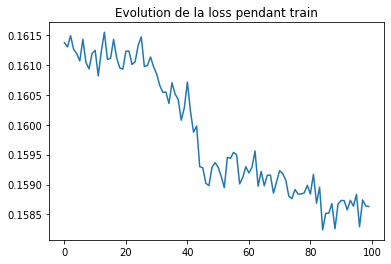

In [16]:
import numpy as np
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()